# 0. Import Dependencies

In [277]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard 

# 1. Load Data

In [278]:
with open("./traffic-signs-data/train.p", mode = 'rb') as train_data:
    train = pickle.load(train_data)
with open("./traffic-signs-data/valid.p", mode = 'rb') as test_data:
    test = pickle.load(test_data)
with open("./traffic-signs-data/test.p", mode = 'rb') as valida_data:
    valid = pickle.load(valida_data)

In [279]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test =  test['features'], test['labels']

# 2. Data Visualization

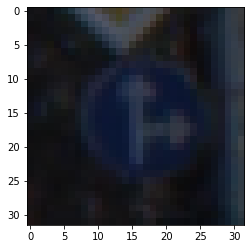

In [280]:
plt.imshow(X_train[1000].squeeze())
plt.show()

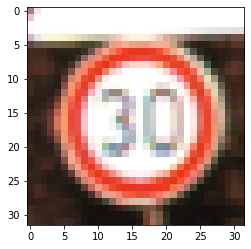

In [281]:
plt.imshow(X_train[3000].squeeze())
plt.show()

In [282]:
print(X_train.shape, X_valid.shape, X_test.shape)

(34799, 32, 32, 3) (12630, 32, 32, 3) (4410, 32, 32, 3)


# 3. Data Normalization

In [283]:
X_train , y_train = shuffle(X_train, y_train) 

In [284]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

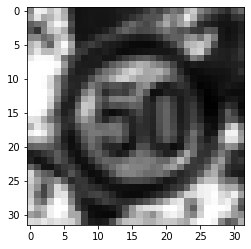

In [285]:
plt.imshow(X_train_gray[3000].squeeze(), cmap='gray')
plt.show()

In [286]:
X_train_gray.shape

(34799, 32, 32, 1)

In [287]:
X_train_gray_norm = X_train_gray / 255
X_valid_gray_norm = X_valid_gray / 255
X_test_gray_norm = X_test_gray / 255

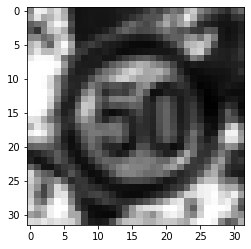

In [288]:
plt.imshow(X_train_gray_norm[3000].squeeze(), cmap='gray')
plt.show()

# 4. Model Training

In [289]:
model = Sequential()

model.add(Conv2D(6, (5,5), activation='relu', input_shape = (32,32,1)))
model.add(AveragePooling2D())

model.add(Conv2D(16, (5,5), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(43, activation='softmax'))

In [290]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_8 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_9 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               51328     
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

In [291]:
model.compile(optimizer = Adam(0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [292]:
history = model.fit(X_train_gray_norm, y_train, batch_size = 128, epochs = 50, verbose=1, validation_data=(X_valid_gray_norm, y_valid))

Epoch 1/50
272/272 [==============================] - 8s 28ms/step - loss: 3.5569 - accuracy: 0.0746 - val_loss: 3.4152 - val_accuracy: 0.1348
Epoch 2/50
272/272 [==============================] - 7s 25ms/step - loss: 3.1618 - accuracy: 0.2236 - val_loss: 2.9076 - val_accuracy: 0.3180
Epoch 3/50
272/272 [==============================] - 8s 29ms/step - loss: 2.4324 - accuracy: 0.4105 - val_loss: 2.2348 - val_accuracy: 0.4074
Epoch 4/50
272/272 [==============================] - 7s 27ms/step - loss: 1.8398 - accuracy: 0.5056 - val_loss: 1.8927 - val_accuracy: 0.4916
Epoch 5/50
272/272 [==============================] - 8s 29ms/step - loss: 1.5078 - accuracy: 0.5924 - val_loss: 1.7049 - val_accuracy: 0.5413
Epoch 6/50
272/272 [==============================] - 8s 30ms/step - loss: 1.2970 - accuracy: 0.6489 - val_loss: 1.5663 - val_accuracy: 0.5928
Epoch 7/50
272/272 [==============================] - 8s 29ms/step - loss: 1.1516 - accuracy: 0.6892 - val_loss: 1.4956 - val_accuracy: 0.6186

# 5. Model Evaluate

In [293]:
score = model.evaluate(X_test_gray_norm, y_test, verbose=0)
print(f"Test Loss: {score[0]}, Test Accuracy: {score[1]}")

Test Loss: 0.6501169800758362, Test Accuracy: 0.8351473808288574


In [294]:
loss = history.history['loss']
accuracy = history.history['accuracy' ]
val_loss = history.history['val_loss' ]
val_accuracy = history.history['val_accuracy']

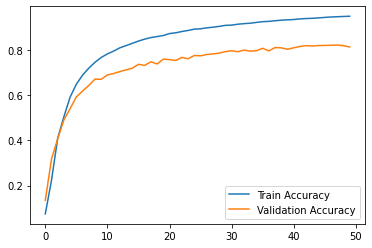

In [295]:
plt.plot(accuracy, label = "Train Accuracy")
plt.plot(val_accuracy, label = "Validation Accuracy")
plt.legend()
plt.show()

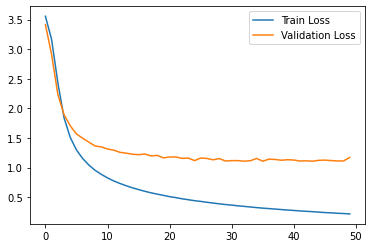

In [296]:
plt.plot(loss, label = "Train Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.show()

In [297]:

y_prob = model.predict(X_test_gray_norm)
y_pred = np.argmax(y_prob, axis=1)


In [298]:
cm = confusion_matrix(y_test, y_pred)

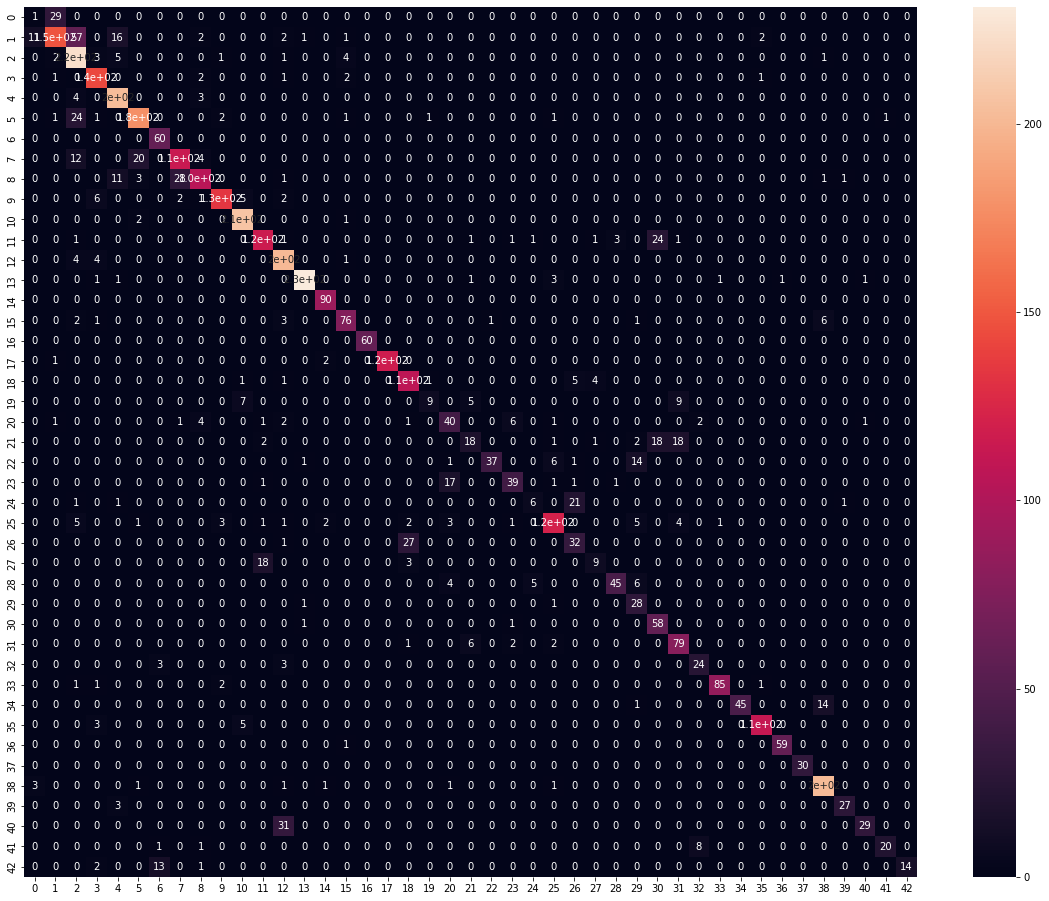

In [299]:
plt.figure(figsize=(20,16))
sns.heatmap(cm, annot=True)
plt.show()

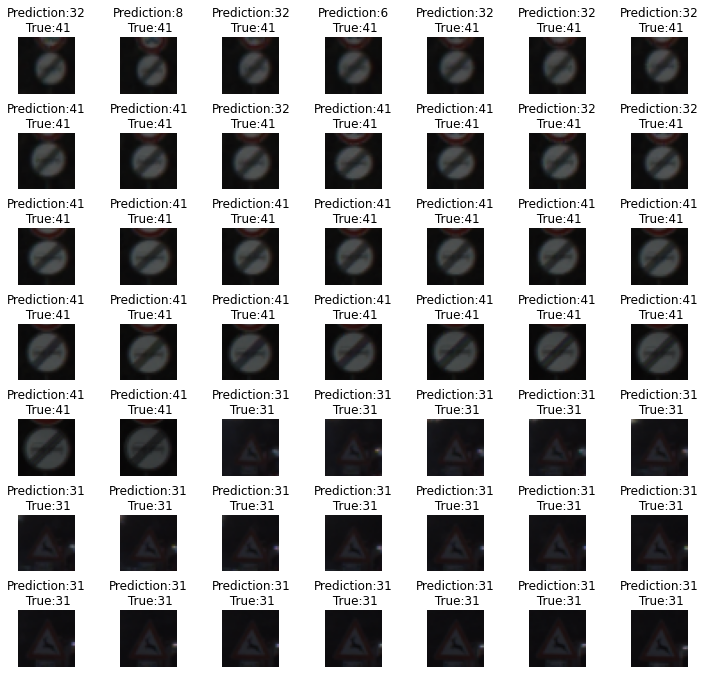

In [300]:
L = 7
W = 7

fig, axes = plt.subplots(L,W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i]) 
    axes[i].set_title(f"Prediction:{y_pred[i]}\n True:{y_test[i]}")
    axes[i].axis("off")

plt.subplots_adjust(wspace=0.8)